In [20]:
import numpy as np 
import pandas as pd

import os, sys, copy
# print(os.listdir("../input"))

import warnings
warnings.filterwarnings("ignore")

import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import get_cmap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

from scipy.stats import norm

In [19]:

from utils.dataloader import DataLoader
from utils.imgplots import plot_two_imgs_by_channel

In [27]:
!./utils/gitpull.sh

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/sutt/sirna-utils
   8aa44d4..a98a99b  master     -> origin/master
Updating 8aa44d4..a98a99b
Fast-forward
 imgplots.py | 2 ++
 1 file changed, 2 insertions(+)


In [21]:
dc = DataLoader()

In [22]:
dc.row_to_ida(1)

{'experiment': 'HEPG2-01', 'plate': 1, 'well': 'B04'}

In [24]:
pics = dc.get_two_sites(sirna=1, experiment='HEPG2-01')

columns are different batches: TODO - implement col names
cropping is on; cropped at (40, 100, 40, 100)


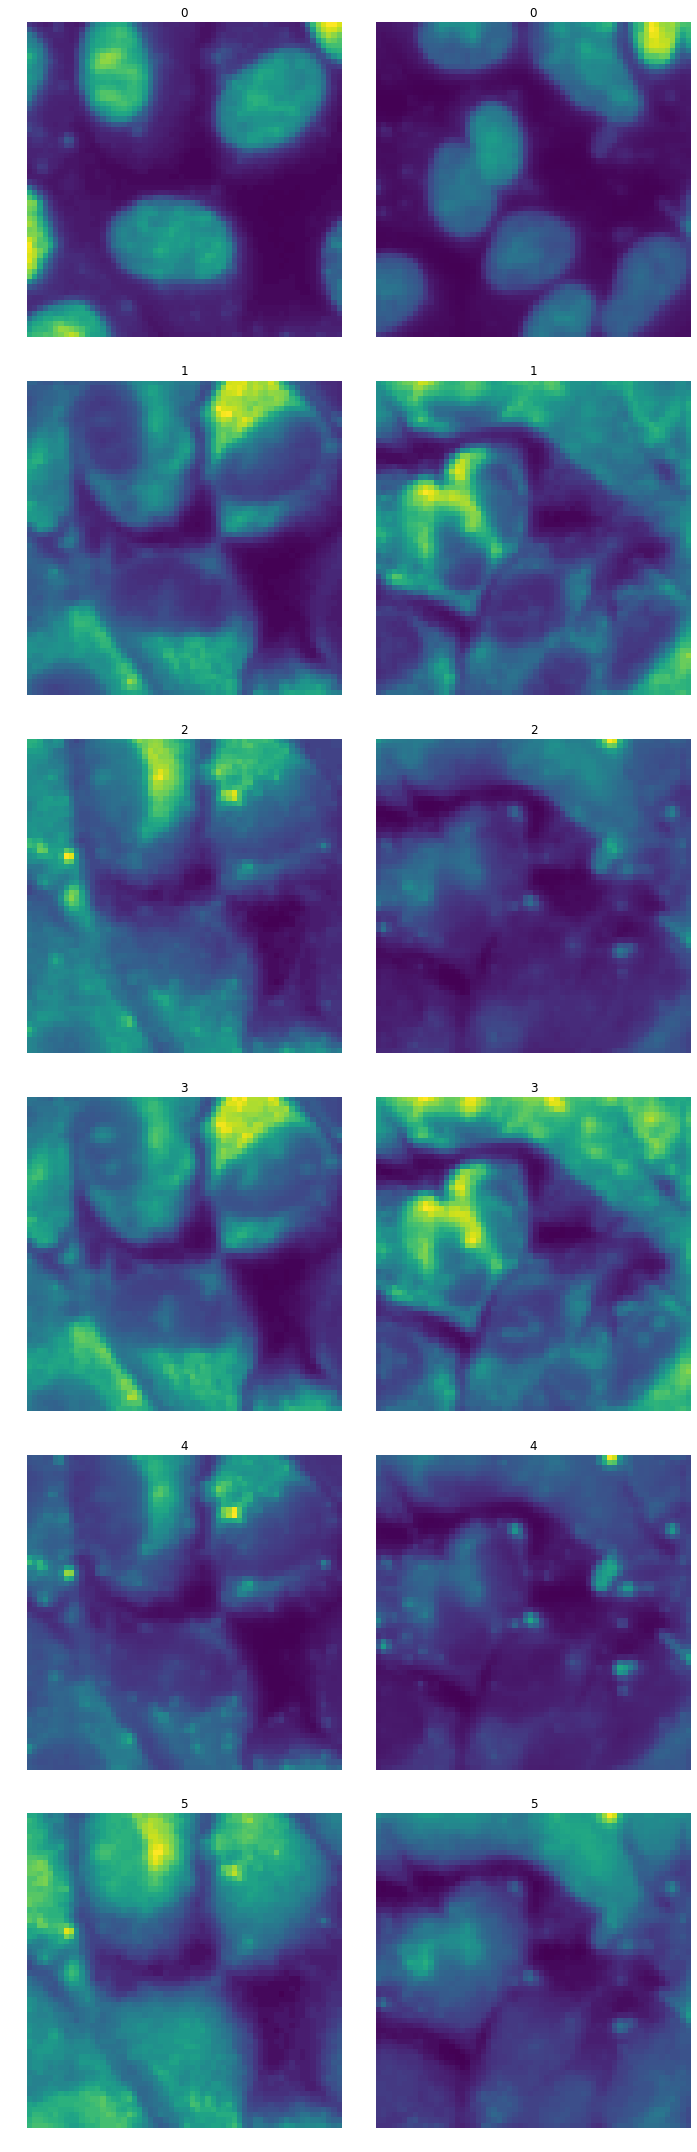

In [25]:
plot_two_imgs_by_channel(pics)

### Look at the same sirna across experiments

In [55]:
#init major objects
dc = DataLoader()
np.random.seed(17)
sirna = 17

In [56]:
#get all possible comparisons for one sirna, ~33 per sirna
sirna17 = dc.get_all_sirna_df(sirna=sirna)
print(sirna17.shape)
sirna17.head(3)

(33, 5)


,id_code,experiment,plate,well,sirna
947,HEPG2-01_4_G22,HEPG2-01,4,G22,17
2050,HEPG2-02_4_G20,HEPG2-02,4,G20,17
3252,HEPG2-03_4_L16,HEPG2-03,4,L16,17


In [57]:
# chose two for comparison and proceed
rand_id_17 = np.random.choice(sirna17['id_code'],2).tolist()
rand_id_17

['HUVEC-09_3_G13', 'HEPG2-07_4_O06']

In [58]:
rand_ida_17 = [dc.train_id_to_ida(e) for e in rand_id_17]
rand_ida_17

[{'experiment': 'HUVEC-09', 'plate': '3', 'well': 'G13'},
 {'experiment': 'HEPG2-07', 'plate': '4', 'well': 'O06'}]

In [62]:
rand_idb_17 = [dc.ida_to_idb(e, site=1) for e in rand_ida_17]
rand_idb_17

[{'experiment': 'HUVEC-09', 'plate': '3', 'well': 'G13', 'site': 1},
 {'experiment': 'HEPG2-07', 'plate': '4', 'well': 'O06', 'site': 1}]

In [68]:
rand_idc_17 = [dc.idb_to_idcs(e) for e in rand_idb_17] 
rand_idc_17[0][:2]

[{'experiment': 'HUVEC-09',
  'plate': '3',
  'well': 'G13',
  'site': 1,
  'channel': 1},
 {'experiment': 'HUVEC-09',
  'plate': '3',
  'well': 'G13',
  'site': 1,
  'channel': 2}]

In [71]:
rand_pic_17 = [dc.load_imgs(
                [dc.idc_to_fn(**channel) for channel in site])
               for site in rand_idc_17]

columns are different batches: TODO - implement col names


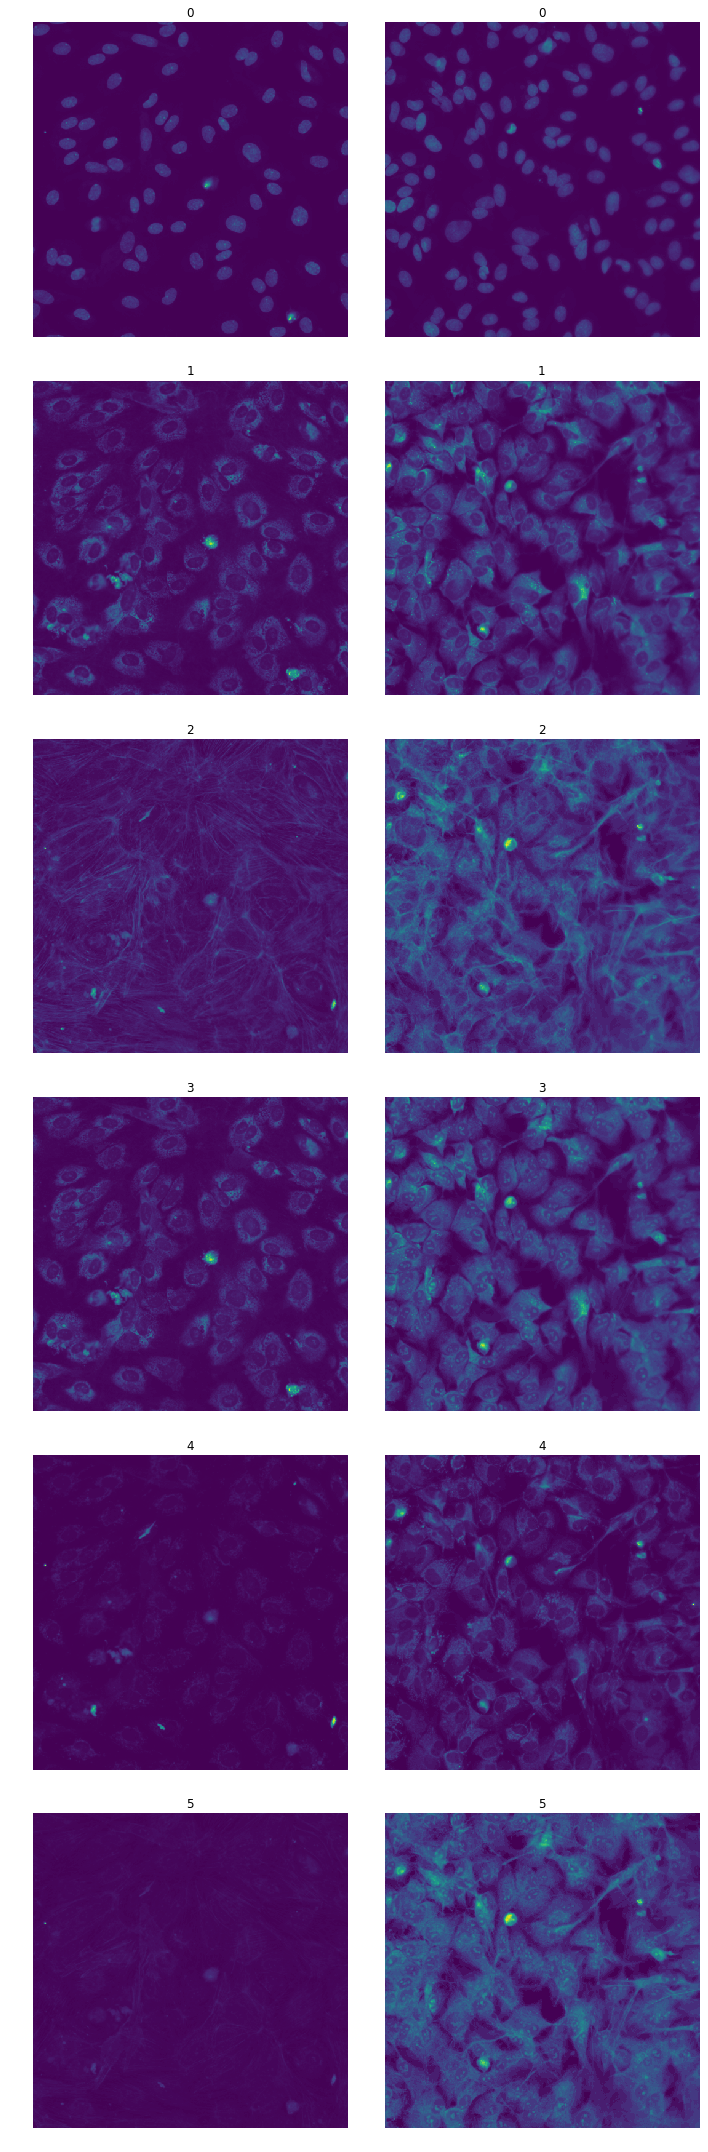

In [73]:
plot_two_imgs_by_channel(rand_pic_17, b_crop=False)

They definetly look different across experiments on *some* channels